In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
 %matplotlib inline
 matplotlib.rcParams.update({'font.size': 12})

__Création de la class *DataVisual* pour organiser l analyse des données__

In [3]:
class DataVisual():
    def __init__(self,file_name,path=None):
        self.file_name = file_name
        self.path = path
        self.displayer = plt
        self.data  = None

    @property
    def fullPath(self):
        return f'{self.path}\\{self.file_name}'   


    @fullPath.setter
    def fullPath(self,data):
        path,name = data.split(" ")
        self.file_name = name
        self.path = path

    def read_data(self):
        self.data = pd.read_csv(self.fullPath)
    
    def fig_config(self,w,h):
        self.displayer.figure(figsize=(w,h))
    

    @classmethod
    def from_name(cls,file_name):
        return cls(file_name,f'{os.getcwd()}\\data')

    @staticmethod
    def ploter(plot_func):
        def graph(*args):
            plot_func(*args)
        return graph

    
     

### On va essayer dans un premier temps de comprendre les ```Features``` pour une bonne analyse

In [4]:

Visualizer = DataVisual.from_name('uber-raw-data-jul14.csv')
Visualizer.read_data()
Visualizer.data.head(5)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


#### Explication des variables : 
***
- Date/Time : La date et l'horaire de <span>Uber pickup</span>
- Lat/Lon : Latitude et Longitude 
- Base : Le code d'entreprise de base TLC affilié au pick-up Uber Avec des valeur possible comme suit


|B02512|B02598|B02617|B02682|B02764|
|------|------|------|------|------|
|Untert|Hinter|Weiter|Schmecken|Danach|

## Maintenant on va commencer la visualizatiokn des donnees

![](./Visual.jpeg)

####  le champs ```Date/Time``` est de type String alors on va le changer en Datetime

In [5]:
Visualizer.data['Date/Time'] = pd.to_datetime(Visualizer.data['Date/Time'] )

On groupe les valuers de Date/Time par 15 min pour faciliter la visualization

In [6]:
Visualizer.data['Floored'] = Visualizer.data['Date/Time'].dt.floor('15min')

In [7]:
Visualizer.data['Floored'].value_counts().sort_values()

2014-07-07 02:30:00     10
2014-07-07 02:00:00     12
2014-07-07 02:15:00     14
2014-07-07 01:45:00     15
2014-07-01 01:30:00     17
                      ... 
2014-07-15 20:00:00    861
2014-07-15 18:00:00    872
2014-07-15 17:45:00    877
2014-07-15 18:15:00    879
2014-07-15 19:15:00    915
Name: Floored, Length: 2976, dtype: int64

In [8]:
Visualizer.data[['Date/Time','Floored']].head(5)

,Date/Time,Floored
0,2014-07-01 00:03:00,2014-07-01 00:00:00
1,2014-07-01 00:05:00,2014-07-01 00:00:00
2,2014-07-01 00:06:00,2014-07-01 00:00:00
3,2014-07-01 00:09:00,2014-07-01 00:00:00
4,2014-07-01 00:20:00,2014-07-01 00:15:00


Visualization : <u>Uber pickups by base</u>

On va exploiter ces données primitives après


[Visual1](#hist-Base)

Text(0, 0.5, 'Number of Rides')

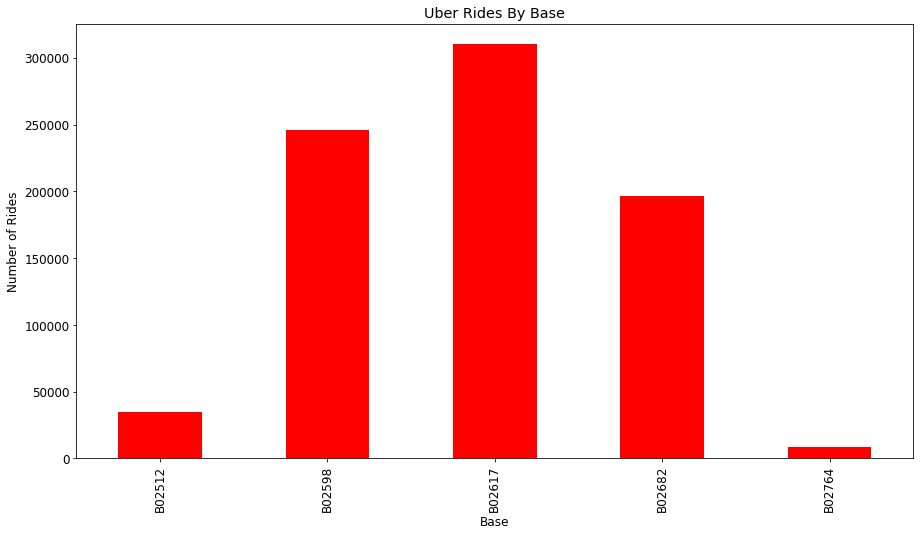

In [9]:
plt.figure(figsize=(15,8))
Visualizer.data["Base"].value_counts().sort_index().plot(kind="bar",color="red")
plt.title('Uber Rides By Base')
plt.xlabel('Base')
plt.ylabel('Number of Rides')

<p><p style="color : red">remarque : </p>On note que les bases [B02617,B02598,B02682] ont un nombre plus élevées que les autre bases alors on suppose que ces base : </p>

- Ont plus de véhicule
- Effectue les pickups dans des zone plus actives touristique/travail ...

[Visual2](#uber-rides-byweek)

Text(0, 0.5, 'Number of Rides')

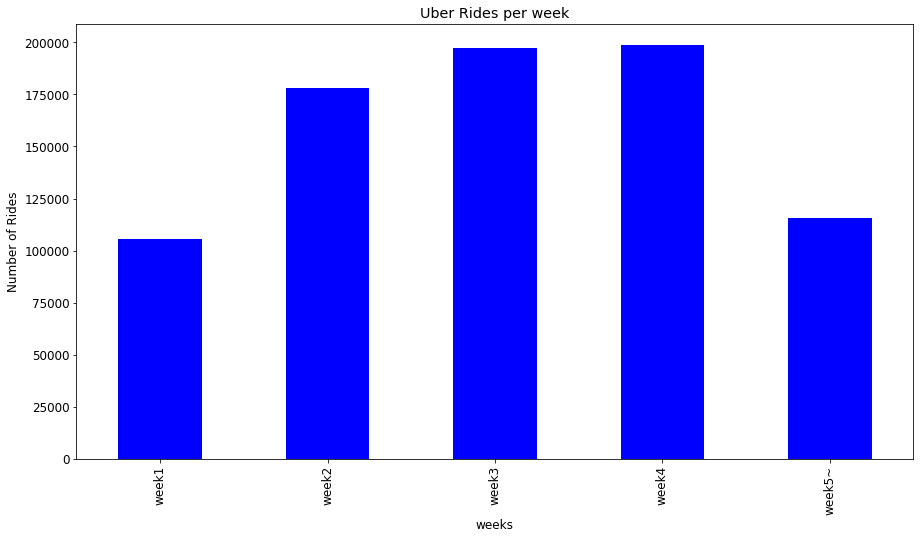

In [10]:
plt.figure(figsize=(15,8))
Visualizer.data['Floored'].dt.isocalendar().week.map({27:"week1",28:"week2",29:"week3",30:"week4",31:"week5~",}).value_counts().sort_index().plot(kind="bar",color='blue')
plt.title('Uber Rides per week')
plt.xlabel('weeks')
plt.ylabel('Number of Rides')

[Visual3](#every-15-min)

Text(0, 0.5, 'Number of Rides')

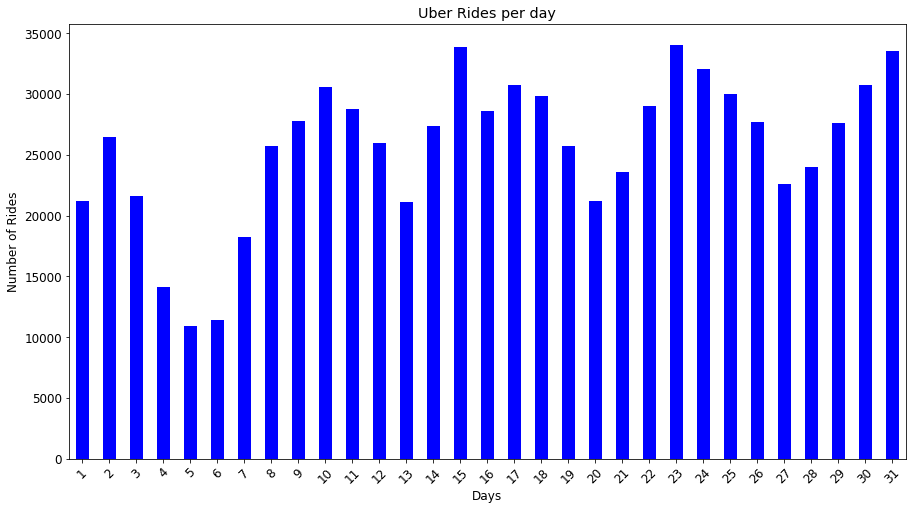

In [11]:
plt.figure(figsize=(15,8))
Visualizer.data['Floored'].dt.day.value_counts().sort_index().plot(kind='bar',color='blue')
for item in plt.gca().get_xticklabels():
    item.set_rotation(45)
plt.title('Uber Rides per day')
plt.xlabel('Days')
plt.ylabel('Number of Rides')

<p style="color : red">remarque : </p>

Le nombre des ```Uber-pickups``` parait normal __augmentation durant les jours de travail et diminution dans les weekend__
[7,13,20,27] on suppose que [4,5,6] sont des jours férié


[Visual4](#Every_15_min)

For every 15 min

Text(0, 0.5, 'Rides')

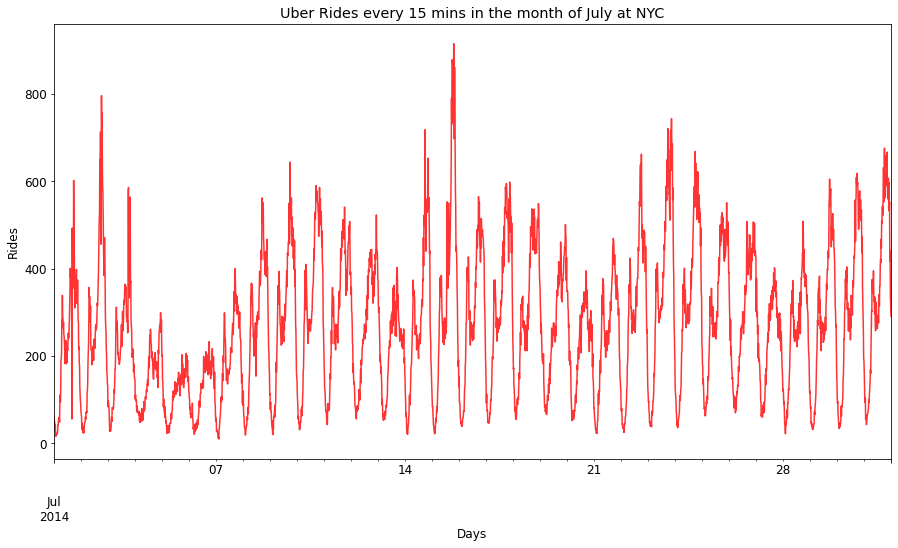

In [12]:
plt.figure(figsize = (15,8))
Visualizer.data['Floored'].value_counts().sort_index().plot(c='red',alpha=0.8)
plt.title('Uber Rides every 15 mins in the month of July at NYC')
plt.xlabel('Days')
plt.ylabel('Rides')

<span style="color : green">Interpritation : </span>
La variation de nombre de pickup pendant un même jours indique qu'il Ya des horaires plus faibles 

H-horaire : on suppose que c'est la nuit 

In [13]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Visualizer.data['Days'] = Visualizer.data['Floored'].dt.weekday.map(days)
Visualizer.data['Days'].head(10).reset_index(0)

,index,Days
0,0,Tuesday
1,1,Tuesday
2,2,Tuesday
3,3,Tuesday
4,4,Tuesday
5,5,Tuesday
6,6,Tuesday
7,7,Tuesday
8,8,Tuesday
9,9,Tuesday


***On divise le champ Date/Time pour avoir ['Date','Time']***

In [14]:
Visualizer.data['Date'],Visualizer.data['Time'] = Visualizer.data['Floored'].dt.date,Visualizer.data['Floored'].dt.time

In [15]:
Visualizer.data['Days']=pd.Categorical(Visualizer.data['Days'],categories=list(days.values()),ordered=True)
Visualizer.data['Days'].head(5)

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: Days, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

<u>Classification des donnees pour L'analyse par semaine</u>

In [16]:
weekly_data = Visualizer.data.groupby(['Date','Days','Time']).count().dropna().rename(columns={'Floored':'Rides'})['Rides'].reset_index()
weekly_data_2 = Visualizer.data.groupby(['Date','Days','Time']).count().dropna().rename(columns={'Floored':'Rides'})['Rides']

In [17]:
type(weekly_data_2),type(weekly_data)
weekly_data.describe()    

,Rides
count,20832.000000
mean,38.216254
std,111.317028
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,915.000000


In [18]:
by_day = weekly_data.groupby('Days').agg("sum")
by_time = weekly_data.groupby('Time').agg("sum")
pd.concat([by_day.reset_index(),by_time.reset_index()],axis=1).head(5)

,Days,Rides,Time,Rides
0,Monday,93189.0,00:00:00,5212
1,Tuesday,137454.0,00:15:00,4683
2,Wednesday,147717.0,00:30:00,4303
3,Thursday,148439.0,00:45:00,3755
4,Friday,102735.0,01:00:00,3510


----------------------------------------------

## Machine learning part

<b style="color : red">
Although the dataset is not meant for machine learning we will try to implement a neural network <p style="font-size : 15">⛔</p>
</b>

<p>Checking missing Data</p>

In [19]:
Visualizer.data.head(15)
Visualizer.data.isna().sum() ## ---> 0

Date/Time    0
Lat          0
Lon          0
Base         0
Floored      0
Days         0
Date         0
Time         0
dtype: int64

<p>Converting DateTime field to timestamp (integer) so the model can understand it</p>

In [20]:
Visualizer.data["timestamp"] = Visualizer.data.Floored.values.astype(np.int64) // 10**9
Visualizer.data["timestamp"].head(5)

0    1404172800
1    1404172800
2    1404172800
3    1404172800
4    1404173700
Name: timestamp, dtype: int64

<p>Encoding data</p>

In [21]:
bases = {}
values = Visualizer.data.Base.unique()
for i,j in enumerate(values):
    bases[j] = i
bases
Visualizer.data.Base=Visualizer.data.Base.map(bases)
Visualizer.data.Base.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Base, dtype: int64

In [22]:
bases

{'B02512': 0, 'B02598': 1, 'B02617': 2, 'B02682': 3, 'B02764': 4}

<p>Normalizing data</p>

In [23]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ["Lat","Lon","timestamp"]

MMscaller = MinMaxScaler()
Visualizer.data[cols_to_scale] = MMscaller.fit_transform(Visualizer.data[cols_to_scale])
Visualizer.data[cols_to_scale].max(),Visualizer.data[cols_to_scale]

(Lat          1.0
 Lon          1.0
 timestamp    1.0
 dtype: float64,
              Lat       Lon  timestamp
 0       0.640286  0.339944   0.000000
 1       0.641459  0.328498   0.000000
 2       0.623866  0.328299   0.000000
 3       0.643311  0.336486   0.000000
 4       0.616705  0.326392   0.000336
 ...          ...       ...        ...
 796116  0.621705  0.334380   0.999328
 796117  0.642077  0.333506   0.999328
 796118  0.589913  0.347534   0.999328
 796119  0.618001  0.326750   0.999664
 796120  0.616396  0.332870   1.000000
 
 [796121 rows x 3 columns])

<p>Creating A class to simplify/organize tensorflow functions</p>

In [24]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

X = Visualizer.data[["Lon","Lat","timestamp"]]
y = Visualizer.data["Base"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
class NN():
    def __init__(self,x,y):
        self.x_train = x
        self.y_train = y
        self.model=None

    def annmodel(self):
        print("_______On the Ann model________")
        model = keras.Sequential([
            keras.layers.Dense(7,input_shape = (3,),activation='relu'),
            keras.layers.Dense(6,activation='relu'),
            keras.layers.Dense(5,activation='sigmoid')
        ])
        model.compile(
            optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        self.model = model
 
    def fit_model(self,epochs):
        self.model.fit(self.x_train,self.y_train,epochs=epochs)

    def ExtractModel(self):
        return self.model


<p style="font-size:17px">As we expected the <span style="color : yellow">performance</span> of the model wasn't quite well due to many reasons : </p>

>Insignificant data

>No correlations

>...

In [25]:
X_train.shape
myModel = NN(X_train,y_train)
myModel.annmodel()
myModel.fit_model(100)

_______On the Ann model________
Epoch 1/10
19903/19903 [==============================] - 33s 2ms/step - loss: 1.2626 - accuracy: 0.3894
Epoch 2/10
19903/19903 [==============================] - 32s 2ms/step - loss: 1.2606 - accuracy: 0.3890
Epoch 3/10
19903/19903 [==============================] - 32s 2ms/step - loss: 1.2605 - accuracy: 0.3894
Epoch 4/10
19903/19903 [==============================] - 33s 2ms/step - loss: 1.2605 - accuracy: 0.3896
Epoch 5/10
19903/19903 [==============================] - 33s 2ms/step - loss: 1.2605 - accuracy: 0.3895
Epoch 6/10
19903/19903 [==============================] - 34s 2ms/step - loss: 1.2604 - accuracy: 0.3896
Epoch 7/10
19903/19903 [==============================] - 34s 2ms/step - loss: 1.2604 - accuracy: 0.3893
Epoch 8/10
19903/19903 [==============================] - 33s 2ms/step - loss: 1.2604 - accuracy: 0.3895
Epoch 9/10
19903/19903 [==============================] - 32s 2ms/step - loss: 1.2603 - accuracy: 0.3893
Epoch 10/10
19903/19903

In [26]:
model_ann = myModel.ExtractModel()
model_ann.evaluate(X_test,y_test)

4976/4976 [==============================] - 9s 2ms/step - loss: 1.2590 - accuracy: 0.3920


[1.2590330839157104, 0.39203014969825745]

In [27]:
from sklearn.metrics import classification_report

y_pred = model_ann.predict(X_test)
y_pred

array([[0.3400481 , 0.77979326, 0.80798453, 0.74283576, 0.10901651],
       [0.33451474, 0.784078  , 0.7898631 , 0.7517592 , 0.11004373],
       [0.3474026 , 0.78717184, 0.8404221 , 0.7500285 , 0.10338476],
       ...,
       [0.3399076 , 0.7791374 , 0.7944746 , 0.7446642 , 0.11287534],
       [0.34162146, 0.7786607 , 0.80395067, 0.7424526 , 0.11135894],
       [0.35047936, 0.7805021 , 0.82333374, 0.74430573, 0.11138585]],
      dtype=float32)

In [28]:
y_pred_class = [np.argmax(e) for e in y_pred]
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7044
           1       0.34      0.09      0.15     49044
           2       0.40      0.93      0.56     62236
           3       0.00      0.00      0.00     39231
           4       0.00      0.00      0.00      1670

    accuracy                           0.39    159225
   macro avg       0.15      0.20      0.14    159225
weighted avg       0.26      0.39      0.26    159225



C:\Users\ELASR\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELASR\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ELASR\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(66.0, 0.5, 'Truth')

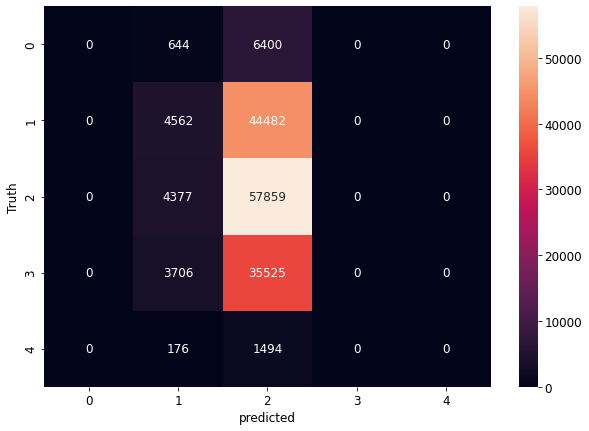

In [29]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=list(y_test),predictions=y_pred_class)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

------------------------------------------

#### On sauvegarde les donnees pour continuer l'analyse avec R 
<h3 style="color : #e74c3c">Voir R_part</h3>

In [30]:
# by_time.to_csv('./R_Part/by_time.csv')
# by_day.to_csv('./R_Part/by_day.csv')
# weekly_data.to_csv('./R_Part/weekly_data.csv')
# Visualizer.data.to_csv('./R_Part/data.csv')

In [31]:
weekly_data[weekly_data.Days == "Monday"].value_counts()

Date        Days    Time      Rides
2014-07-01  Monday  00:00:00  0        1
2014-07-21  Monday  16:45:00  455      1
                    14:30:00  324      1
                    14:45:00  303      1
                    15:00:00  323      1
                                      ..
2014-07-11  Monday  08:30:00  0        1
                    08:45:00  0        1
                    09:00:00  0        1
                    09:15:00  0        1
2014-07-31  Monday  23:45:00  0        1
Length: 2976, dtype: int64

In [32]:
weekly_data_2 = weekly_data.groupby(['Days','Time']).mean()['Rides']
weekly_data_2.reset_index()[weekly_data_2.reset_index().Days == "Friday"].head(5)

,Days,Time,Rides
384,Friday,00:00:00,24.677419
385,Friday,00:15:00,19.870968
386,Friday,00:30:00,19.096774
387,Friday,00:45:00,15.709677
388,Friday,01:00:00,15.483871
